# FINAL PROJECT PURWADHIKA AWS SAAS SALES BY NIKKO HALDI OKTAVYARDI

# Import and Data Source

In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import folium
import plotly.express as px

In [3]:
# Tentukan path relatif
file_path = "SaaS-Sales.csv"

# Cek apakah file ada di path yang ditentukan
if os.path.exists(file_path):
    df_sales = pd.read_csv(file_path)
    print(df_sales.head())

   row_id          order_id  order_date  date_key    contact_name  \
0       1  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
1       2  EMEA-2022-152156   11/9/2022  20221109     Nathan Bell   
2       3  AMER-2022-138688   6/13/2022  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   
4       5  EMEA-2021-108966  10/11/2021  20211011      Zoe Hodges   

         country           city region subregion           customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   customer_id industry    segment                 product     license  \
0         1017   Energy        SMB         Marketing Suite  16GRM07R1K   
1         

In [4]:
df_sales

,row_id,order_id,order_date,date_key,contact_name,country,city,region,subregion,customer,customer_id,industry,segment,product,license,sales,quantity,discount,profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


# 1. Variasi Angka Penjualan di Berbagai Negara, Kota, dan Wilayah

- Negara mana yang memiliki total penjualan tertinggi?
- Kota mana yang memiliki rata-rata penjualan tertinggi per transaksi?
- Wilayah mana yang memiliki margin keuntungan tertinggi?
- Bagaimana distribusi penjualan berdasarkan jenis industri di berbagai wilayah?
- Bagaimana pengaruh diskon terhadap penjualan di berbagai wilayah?

In [ ]:
#A. Negara mana yang memiliki total penjualan tertinggi?

sales_by_country = df_sales.groupby('country')['sales'].sum().reset_index()
sales_by_country["sales"] = sales_by_country["sales"].round(2)
sales_by_country = sales_by_country.sort_values(by='sales', ascending=False)
# top_10_sales_by_country = sales_by_country.head(10)
# print("penjualantertinggi:")
# print(sales_by_country.to_string(index=False))
sales_by_country


,country,sales
47,United States,457687.63
46,United Kingdom,313169.88
24,Japan,170188.05
5,Canada,138641.27
15,France,116511.91
16,Germany,89473.71
1,Australia,80166.10
26,Mexico,78258.14
4,Brazil,76269.61
40,Spain,70636.72


## Analisa A
United State(Amerika) memiliki total penjualan paling tinggi yaitu sejumlah 457687.63. Penjualan di Amerika Serikat dan Inggris mendominasi, yang mungkin menunjukkan adanya produk atau strategi yang sangat disukai di kedua pasar tersebut.
Pasar dengan kontribusi lebih kecil, seperti Qatar dan Iceland, mungkin memerlukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi penjualan rendah di negara tersebut.

**Rekomendasi :**
- Strategi: Terus pertahankan dan tingkatkan strategi yang sukses di pasar ini. Pertimbangkan untuk memperluas penawaran produk atau layanan, meningkatkan kampanye pemasaran, dan memperkuat hubungan dengan pelanggan.
- Investasi: Pertimbangkan untuk meningkatkan investasi dalam pengembangan pasar dan inovasi produk untuk tetap unggul di pasar yang kompetitif ini.

In [ ]:
# B. Kota mana yang memiliki rata-rata penjualan tertinggi per transaksi?

avg_sales_by_city = df_sales.groupby('city')['sales'].mean().reset_index()
avg_sales_by_city['sales'] = avg_sales_by_city['sales'].round(2)
avg_sales_by_city = avg_sales_by_city.sort_values(by='sales', ascending=False)
total_avg_sales_by_city = avg_sales_by_city['sales'].sum()
avg_sales_by_city['percentage'] = avg_sales_by_city['sales'] / total_avg_sales_by_city * 100
avg_sales_by_city['percentage'] = avg_sales_by_city['percentage'].round(2)
avg_sales_by_city['percentage'] = avg_sales_by_city['percentage'].astype(str) + ' ' + '%'
avg_sales_by_city



,city,sales,percentage
86,Glasgow,2354.40,3.81 %
134,Ljubljana,1603.14,2.59 %
156,Minneapolis,1082.39,1.75 %
248,Venice,835.66,1.35 %
41,Cairo,811.76,1.31 %
...,...,...,...
27,Bologna,26.85,0.04 %
55,Clinton,22.00,0.04 %
231,Tampa,19.44,0.03 %
191,Quebec,17.27,0.03 %


## Analisa B

- Glasgow memiliki rata rata penjualan paling tinggi dibandingkan beberapa kota yang lain, Glasgow memiliki pesentase penjualan sebesar 3.81% dengan rata - rata penjualan sebesar 2354.40 selama transaksi berlangsung.
Glasgow memiliki kontribusi terbesar di antara kota lain, dengan hampir 4% dari total penjualan. Ini menunjukkan bahwa Glasgow adalah pasar yang signifikan - untuk produk atau layanan yang ditawarkan.
- Venice dan Cairo, meskipun berada di bawah 1,5% kontribusi, masih dapat dipertimbangkan untuk pengembangan lebih lanjut. Mungkin perlu dilakukan penelitian lebih lanjut untuk memahami faktor-faktor yang membatasi penjualan di kota-kota ini dan menyesuaikan strategi pemasaran atau distribusi.

**Rekomendasi** :
- Dengan melihat persentase kontribusi penjualan, perusahaan dapat mengidentifikasi kota-kota yang memberikan hasil signifikan dan kota-kota yang mungkin memerlukan peninjauan ulang terhadap strategi yang diterapkan.

In [ ]:
#C. Wilayah mana yang memiliki margin keuntungan tertinggi?

profit_by_region = df_sales.groupby('region')['profit'].sum().reset_index().round(2)
profit_by_region = profit_by_region.sort_values(by='profit', ascending=False)
total_profit = profit_by_region['profit'].sum()
profit_by_region['percentage'] = profit_by_region['profit'] / total_profit * 100
profit_by_region['percentage'] = profit_by_region['percentage'].round(2)
profit_by_region['percentage'] = profit_by_region['percentage'].astype(str) + ' ' + '%'
profit_by_region



,region,profit,percentage
2,EMEA,147456.05,51.49 %
0,AMER,127426.99,44.49 %
1,APJ,11513.99,4.02 %


## Analisa C
EMEA atau Europe Middle East and Africa memiliki margin keuntungan yang tinggi yaitu lebih dari 50% dibandingkan 2 Region yang lain, yaitu AMER dan APJ. Ini mengindikasikan bahwa EMEA tidak hanya menghasilkan banyak profit, tetapi juga memiliki margin keuntungan yang tinggi.

**Rekomendasi :**
- Strategi: Pertahankan dan tingkatkan strategi yang telah terbukti berhasil di wilayah ini. Identifikasi elemen kunci yang menyebabkan profit dan margin keuntungan tinggi, dan coba terapkan elemen tersebut ke wilayah lain jika memungkinkan.
- Ekspansi: Pertimbangkan untuk memperluas operasi atau investasi lebih lanjut di wilayah ini, mengingat keberhasilannya dalam menghasilkan profit dan margin tinggi.

In [ ]:
# D. Bagaimana distribusi penjualan berdasarkan jenis industri di berbagai wilayah?

industry_sales_by_region = df_sales.groupby(['region', 'industry'])['sales'].sum().reset_index()
industry_sales_by_region['sales'] = industry_sales_by_region['sales'].round(2) 
industry_sales_by_region = industry_sales_by_region.sort_values(by='sales', ascending=False)
# print(industry_sales_by_region)

# limit 10
# top_10_industry_sales_by_region = industry_sales_by_region.head(10)
# top_10_industry_sales_by_region

industry_sales_by_region

,region,industry,sales
23,EMEA,Finance,217353.97
3,AMER,Finance,173778.60
24,EMEA,Healthcare,137447.30
25,EMEA,Manufacturing,137307.60
22,EMEA,Energy,131359.41
28,EMEA,Tech,115741.99
5,AMER,Manufacturing,109155.66
4,AMER,Healthcare,107004.29
2,AMER,Energy,105636.86
8,AMER,Tech,100253.39


In [ ]:
# E. Bagaimana pengaruh diskon terhadap penjualan di berbagai wilayah?

discount_sales_by_region = df_sales.groupby('region').agg({'sales': 'sum', 'discount': 'sum'}).reset_index()
discount_sales_by_region['sales'] = discount_sales_by_region['sales'].round(2)
discount_sales_by_region = discount_sales_by_region.sort_values(by='sales', ascending=False)
discount_sales_by_region['discount_ratio'] = (discount_sales_by_region['discount'] / discount_sales_by_region['sales'])
discount_sales_by_region

,region,sales,discount,discount_ratio
2,EMEA,1043887.02,596.45,0.000571
0,AMER,837849.60,400.80,0.000478
1,APJ,415464.24,563.84,0.001357


<Axes: xlabel='region', ylabel='sales'>

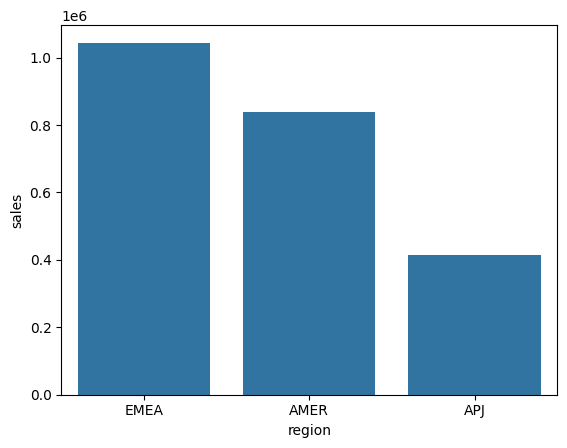

In [ ]:
data_ratio = { 
  'discount_ratio' : [0.000571, 0.000478, 0.001357],
  'sales' : [1043887.02, 837849.60, 415464.24],
  'region' : ['EMEA', 'AMER', 'APJ']
}       

sns.barplot(x='region', y='sales', data=data_ratio)

## Analisa E
- **EMEA** : EMEA adalah wilayah dengan penjualan tertinggi, menunjukkan bahwa pasar di wilayah ini sangat kuat dan responsif terhadap produk atau layanan yang ditawarkan.
- **AMER** : Penjualan di AMER juga cukup signifikan, menunjukkan bahwa wilayah ini merupakan pasar yang penting bagi perusahaan. Posisi yang kuat yang bisa diperkuat dengan strategi yang tepat.
- **APJ** : Meskipun penjualannya lebih rendah dibandingkan EMEA dan AMER, APJ merupakan pasar yang besar dan memiliki potensi pertumbuhan yang besar. Penjualan di APJ jauh di bawah EMEA dan AMER, menunjukkan bahwa ada tantangan signifikan yang perlu diatasi.


**Kesimpulan**
- Wilayah EMEA mencatatkan penjualan tertinggi dibandingkan wilayah lainnya, dengan total 1,043,887.02. Ini menunjukkan bahwa EMEA adalah pasar yang sangat menguntungkan dan berpotensi tinggi.
- Wilayah AMER berada di posisi kedua dengan penjualan 837,849.60, yang juga merupakan angka yang signifikan tetapi lebih rendah dibandingkan EMEA.
- Wilayah APJ memiliki penjualan terendah sebesar 415,464.24. Ini menunjukkan bahwa APJ saat ini kurang berkontribusi pada total penjualan dibandingkan wilayah lainnya.

**Rekomendasi:**
- Fokus pada Pengembangan EMEA: Mengingat EMEA adalah wilayah dengan penjualan tertinggi, perusahaan harus terus memperkuat strategi pemasaran dan penjualannya di wilayah ini. Pertimbangkan untuk meningkatkan investasi dalam pemasaran dan dukungan pelanggan di EMEA untuk memanfaatkan potensi yang ada.
- Tingkatkan Strategi untuk AMER: Wilayah AMER juga menunjukkan kinerja yang baik. Perusahaan dapat mempertimbangkan untuk memperkenalkan inisiatif baru atau penawaran khusus untuk mempertahankan dan meningkatkan pertumbuhan penjualan di wilayah ini.
- Optimalkan Pendekatan di APJ: Karena APJ menunjukkan penjualan terendah, penting untuk menganalisis alasan di balik kinerja yang kurang ini. Pertimbangkan untuk mengevaluasi strategi pemasaran, analisis kebutuhan pasar lokal, dan kemungkinan penyesuaian produk atau layanan untuk meningkatkan daya tarik di APJ.

# 2. Kategori Produk dengan Penjualan dan Margin Keuntungan Tertinggi

- Produk mana yang memiliki total penjualan tertinggi?
- Apakah ada korelasi antara jumlah produk yang terjual dan margin keuntungan?
- Bagaimana kinerja produk dalam berbagai segmen pelanggan (SMB, Strategic, Enterprise)?

In [25]:
# A. Produk mana yang memiliki total penjualan tertinggi?

product_sales = df_sales.groupby('product')['sales'].sum().reset_index().round(2)
# product_sales = product_sales.sort_values(by='sales', ascending=False).head(5)
total_sales = product_sales['sales'].sum()
product_sales['percentage'] = (product_sales['sales'] / total_sales) * 100
product_sales['percentage'] = product_sales['percentage'].round(2)
# product_sales['summary'] = product_sales.apply(
#     lambda row: f"{row['product']}: {row['sales']:,.2f} ({row['percentage']}%)", axis=1)
product_sales

,product,sales,percentage
0,Alchemy,149528.03,6.51
1,Big Ol Database,189238.63,8.24
2,ChatBot Plugin,27118.79,1.18
3,ContactMatcher,410378.26,17.86
4,Data Smasher,167380.32,7.29
5,FinanceHub,340935.42,14.84
6,Marketing Suite,114880.00,5.00
7,Marketing Suite - Gold,223843.61,9.74
8,OneView,107532.16,4.68
9,SaaS Connector Pack,91705.16,3.99


## Analisa A

ContactMatcher menonjol sebagai produk dengan penjualan tertinggi, mencapai 410,378.26 dan menyumbang 27.46% dari total penjualan. Ini menunjukkan bahwa ContactMatcher sangat populer di pasar dan memiliki daya tarik yang kuat bagi pelanggan.

Dominasi ContactMatcher: Penjualan yang dominan dari ContactMatcher menunjukkan bahwa produk ini mungkin memiliki keunggulan kompetitif yang signifikan atau memenuhi kebutuhan pelanggan dengan sangat baik. Pertimbangkan untuk meningkatkan fokus pemasaran dan promosi untuk produk ini.


In [19]:
# Korelasi antara jumlah produk dengan margin keuntungan
product_quantity_profit = df_sales.groupby('product').agg({'quantity': 'sum', 'profit': 'sum'}).reset_index().round(2)
product_quantity_profit = product_quantity_profit.sort_values(by=['quantity', 'profit'], ascending=[False, False])
correlation, p_value = pearsonr(product_quantity_profit['quantity'],product_quantity_profit['profit'])
correlation_round = round(correlation, 2)
product_quantity_profit['correlation'] = correlation_round
# correlation
product_quantity_profit



,product,quantity,profit,correlation
3,ContactMatcher,7215,12496.28,0.17
13,Support,5825,32864.47,0.17
5,FinanceHub,3756,32136.42,0.17
9,SaaS Connector Pack,3563,13059.14,0.17
11,Site Analytics,3289,44515.73,0.17
7,Marketing Suite - Gold,3158,21278.83,0.17
2,ChatBot Plugin,3000,6527.79,0.17
4,Data Smasher,2976,41936.64,0.17
8,OneView,1729,18138.01,0.17
12,Storage,914,949.52,0.17


Text(0, 0.5, 'profit')

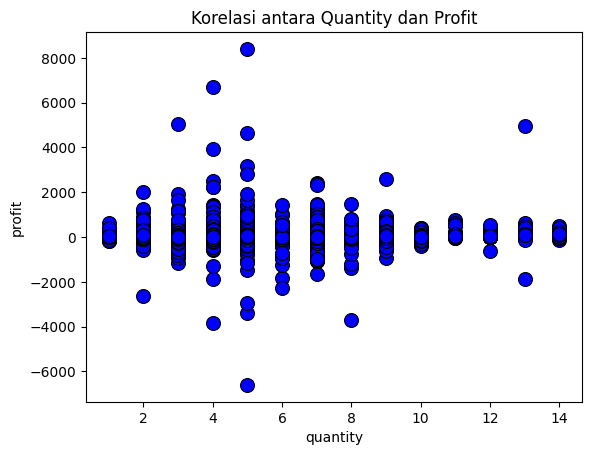

In [ ]:
sns.scatterplot(x='quantity', y='profit', data=df_sales, s=100, color='b', edgecolor='k')
plt.title('Korelasi antara Quantity dan Profit')
plt.xlabel('quantity')
plt.ylabel('profit')

### Hasil Analisa korelasi antara jumlah produk yang terjual dan margin keuntungan

Nilai Korelasi (0.169): Korelasi Positif Sangat Lemah hal ini menunjukkan adanya hubungan positif yang lemah antara dua variabel yang dianalisis. Ini berarti bahwa ada sedikit kecenderungan bahwa saat nilai satu variabel meningkat, nilai variabel lainnya juga cenderung meningkat, tetapi hubungan ini sangat lemah.

Dari analisis korelasi ini, dapat disimpulkan bahwa hubungan antara variabel-variabel yang dianalisis adalah positif tetapi sangat lemah. Ini berarti bahwa meskipun ada sedikit kecenderungan bahwa ketika satu variabel meningkat, variabel lainnya juga meningkat, hubungan ini tidak cukup kuat untuk dianggap signifikan secara praktis. Penting untuk mengeksplorasi data lebih lanjut dan mempertimbangkan analisis lain untuk mendapatkan wawasan yang lebih mendalam.

In [ ]:
# kinerja produk dalam berbagai segmen pelanggan (SMB, Strategic, Enterprise)

#total penjualan dan keuntungan persegmen
segment_summary = df_sales.groupby('segment').agg({
    'sales' : 'sum',
    'profit' : 'sum',
    'quantity' : 'sum'
}).reset_index().round(2)
segement_summary = df_sales.sort_values(by='profit', ascending=False)
print('total penjualan dan keuntungan persegmen:')
print(segment_summary)
print('\n')

# rata-rata penjualan dan keuntungan per transaksi per segmen
segment_avg = df_sales.groupby('segment').agg({
    'sales' : 'mean',
    'profit' : 'mean',
    'quantity' : 'mean'
}).reset_index().round(2)
segment_avg = segment_avg.sort_values(by='profit', ascending=False)
print('rata-rata penjualan dan keuntungan per transaksi per segmen:')
print(segment_avg)
print('\n')

#total penjualan dan keuntungan per produk dan segmen
product_segment_summary = df_sales.groupby(['segment', 'product']).agg({
    'sales' : 'sum',
    'profit' : 'sum'
}).reset_index().round(2)



total penjualan dan keuntungan persegmen:
      segment       sales     profit  quantity
0  Enterprise   429653.15   60298.68      6744
1         SMB  1161401.34  134119.21     19521
2   Strategic   706146.37   91979.13     11608


rata-rata penjualan dan keuntungan per transaksi per segmen:
      segment   sales  profit  quantity
0  Enterprise  240.97   33.82      3.78
2   Strategic  233.82   30.46      3.84
1         SMB  223.73   25.84      3.76




**Chart**

In [ ]:
product_segment_sales = df_sales.groupby(['product', 'segment']).agg({
    'sales' : 'sum',
    'profit' : 'sum'
}).reset_index().round(2)
product_segment_sales_sorted = product_segment_sales.sort_values(by='sales', ascending=False)
print('total produk yang paling laku:')
product_segment_sales_sorted


total produk yang paling laku:


,product,segment,sales,profit
10,ContactMatcher,SMB,218094.80,8267.56
16,FinanceHub,SMB,179572.00,16311.32
34,Site Analytics,SMB,169932.76,23837.11
11,ContactMatcher,Strategic,122432.03,1470.82
17,FinanceHub,Strategic,103242.52,10105.48
22,Marketing Suite - Gold,SMB,100492.40,7104.20
35,Site Analytics,Strategic,91153.41,11766.22
13,Data Smasher,SMB,87105.24,20735.92
23,Marketing Suite - Gold,Strategic,79791.00,9131.02
4,Big Ol Database,SMB,79542.82,2141.06


## Versi Heatmap

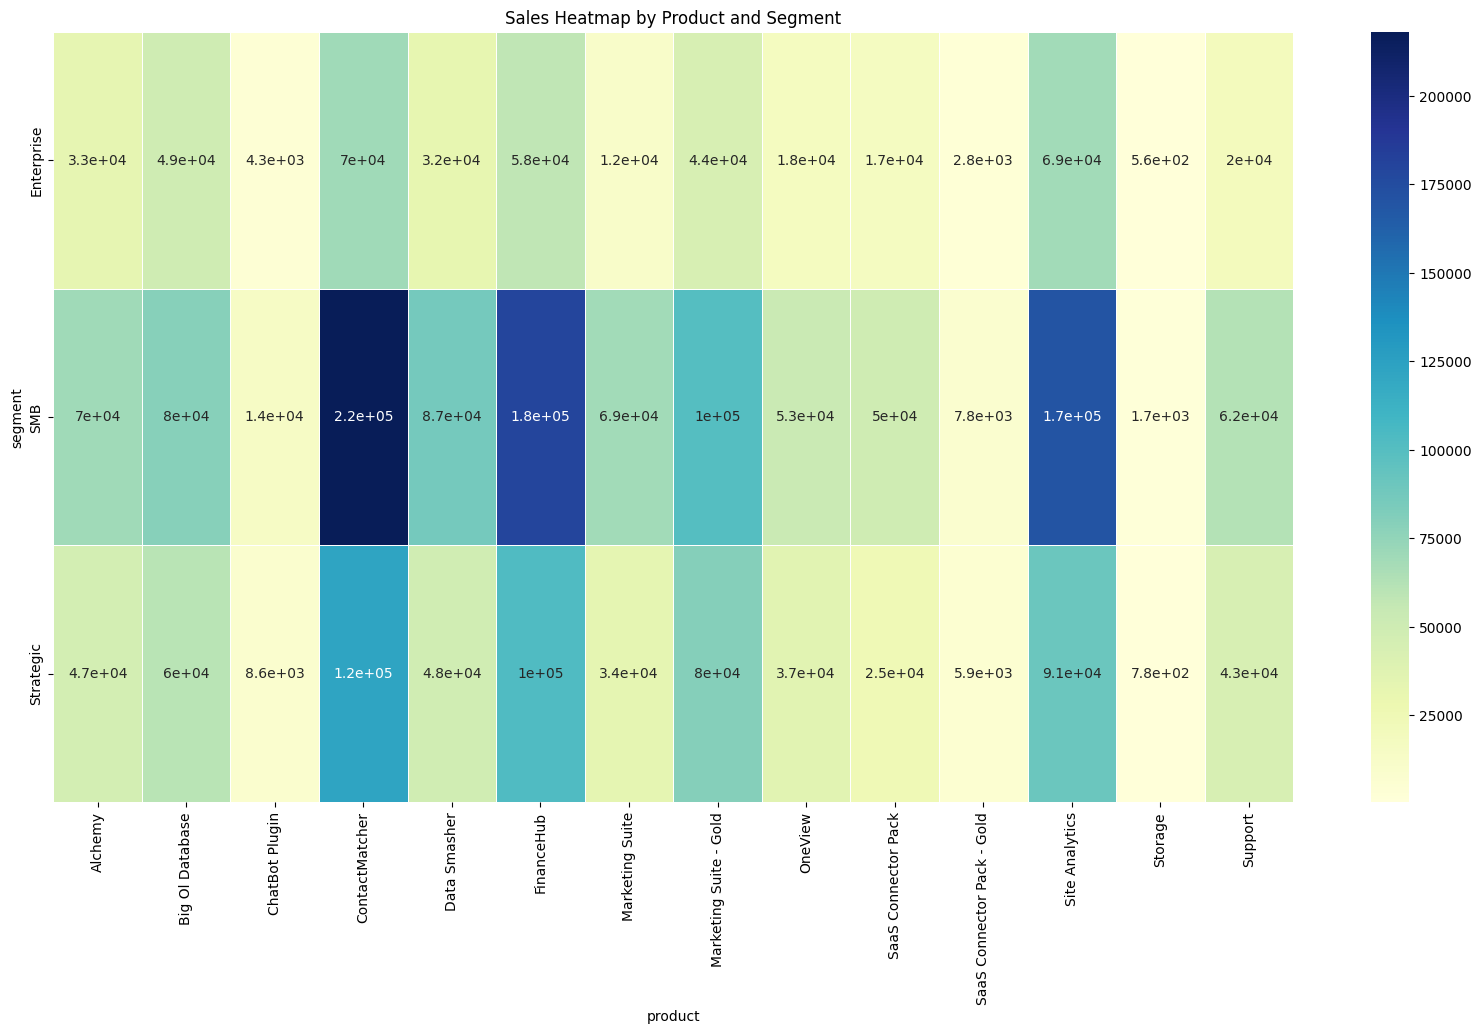

In [ ]:
heatmap_data = product_segment_summary.pivot_table(index='segment', columns='product', values='sales', aggfunc='sum')
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Sales Heatmap by Product and Segment')
plt.show()

## Versi Barplot

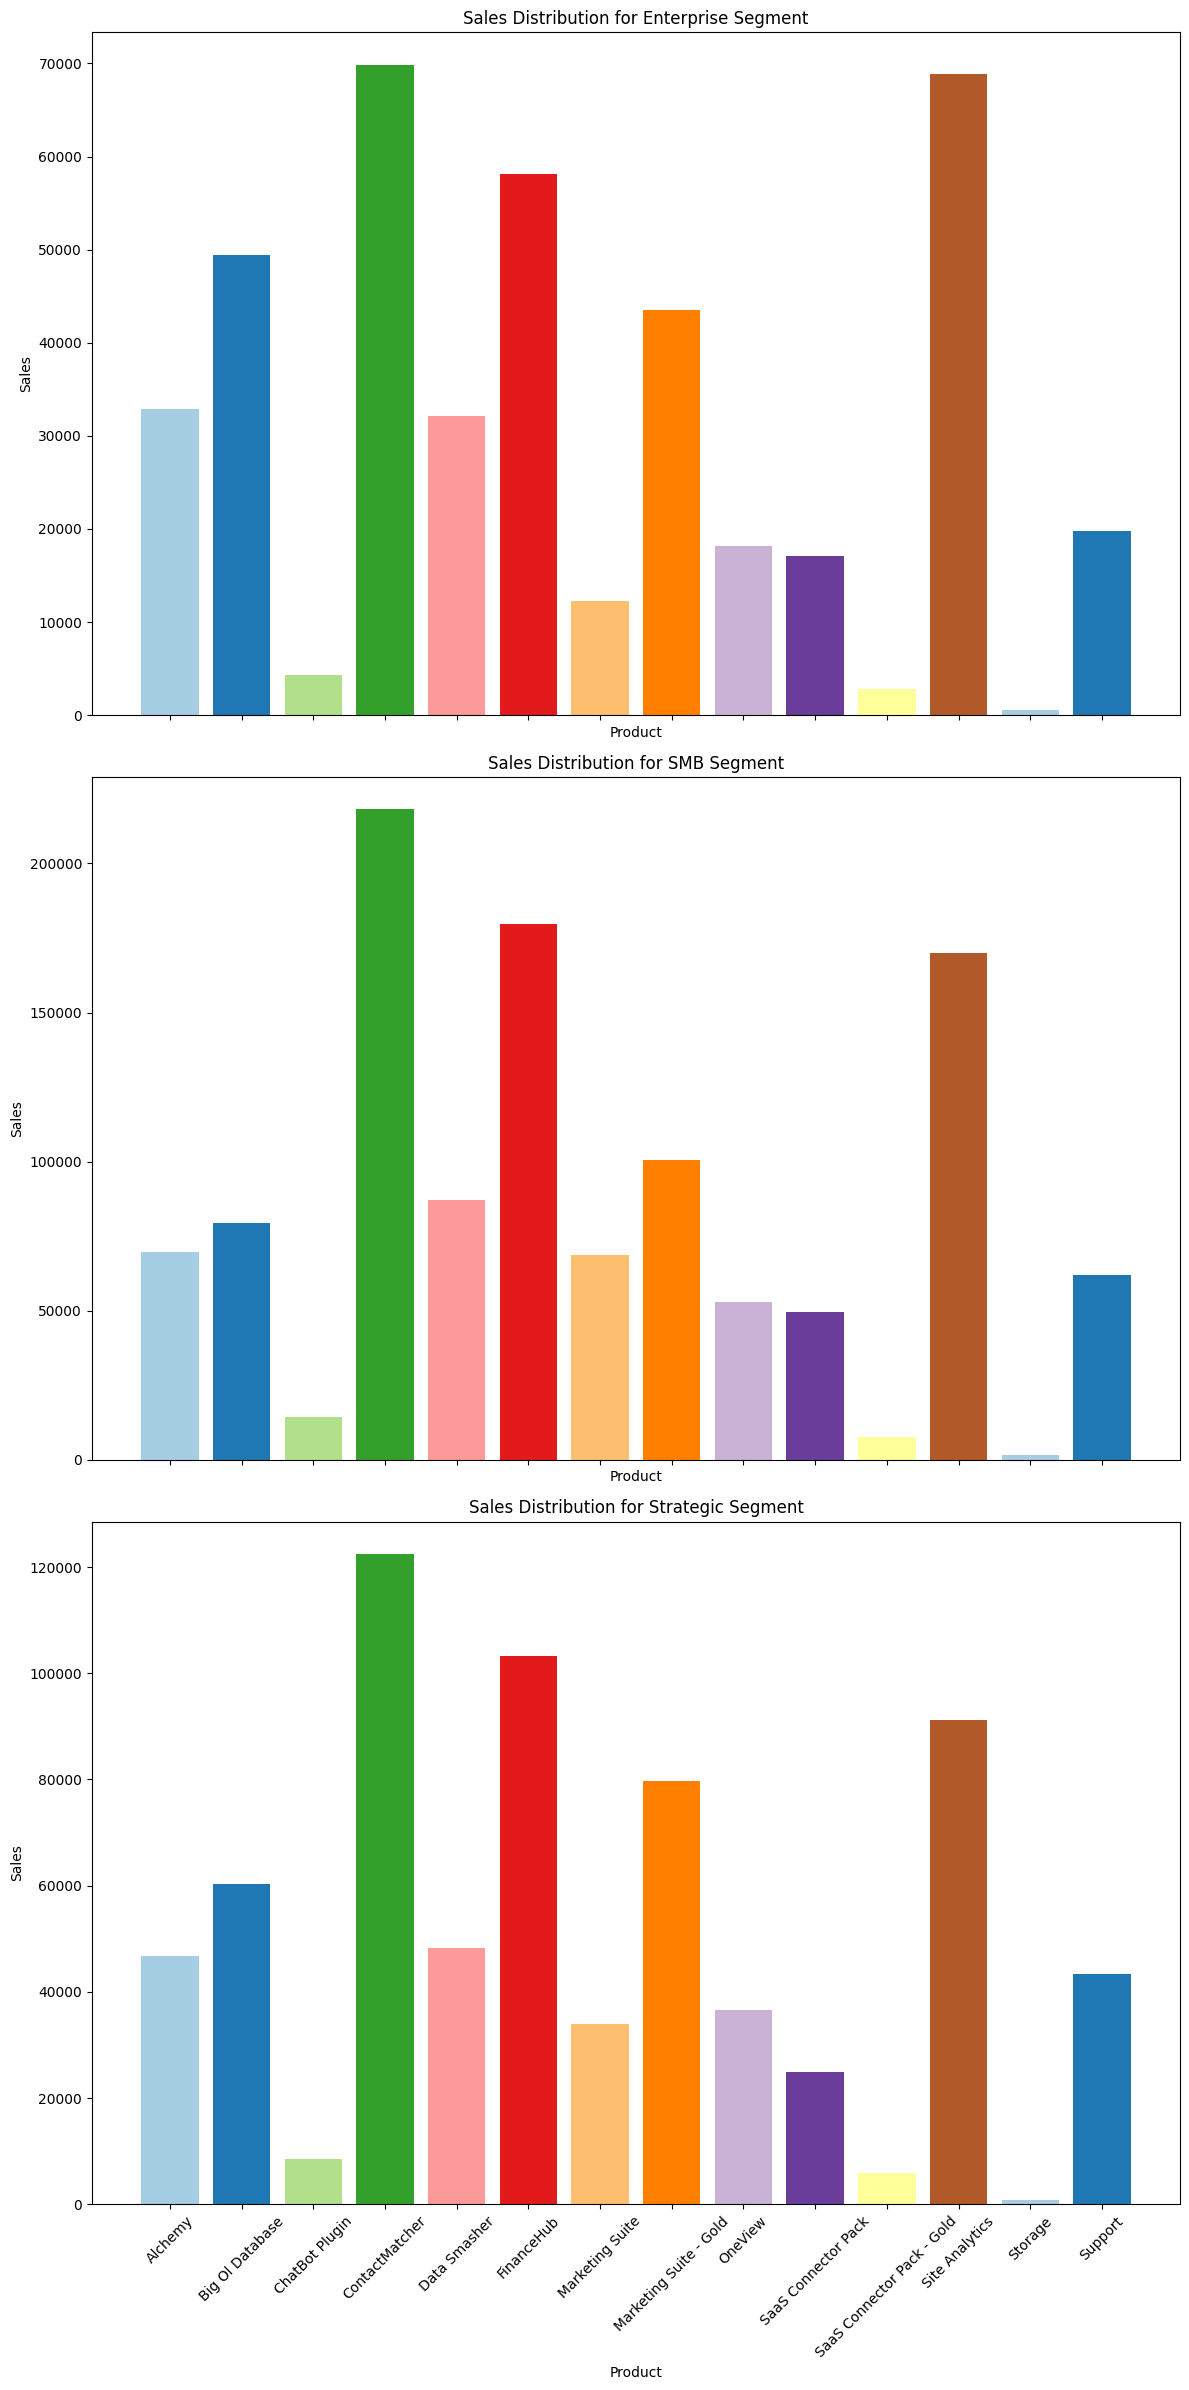

In [ ]:
# Menghitung total penjualan per produk untuk setiap segmen
product_segment_summary = df_sales.groupby(['segment', 'product']).sum().unstack()

# Plot bar chart untuk setiap segmen
segments = product_segment_summary.index
products = product_segment_summary.columns.levels[1]

fig, axes = plt.subplots(len(segments), 1, figsize=(12, 8 * len(segments)), sharex=True)

for i, segment in enumerate(segments):
    axes[i].bar(products, product_segment_summary.loc[segment, 'sales'], color=plt.cm.Paired.colors)
    axes[i].set_title(f'Sales Distribution for {segment} Segment')
    axes[i].set_ylabel('Sales')
    axes[i].set_xlabel('Product')

# plt.suptitle('Sales Distribution by Product and Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analisa kinerja produk dalam berbagai segmen pelanggan 

1. Segmen SMB (Small and Medium Business) :
    - **ContactMatcher** adalah produk dengan penjualan tertinggi di segmen SMB, mencapai 218,094.80, dengan keuntungan 8,267.56. Produk ini menunjukkan dominasi yang kuat di segmen SMB.
    - **FinanceHub** juga merupakan produk utama dengan penjualan 179,572.00 dan keuntungan 16,311.32, menunjukkan kinerja yang sangat baik dalam hal pendapatan dan keuntungan.
    - **Site Analytics** memiliki penjualan $169,932.76 dan keuntungan $23,837.11, menjadikannya produk yang sangat populer dengan margin keuntungan tertinggi di segmen SMB.

2. Segmen Strategic
    - **ContactMatcher** adalah produk utama dengan penjualan $122,432.03 dan keuntungan $1,470.82, meskipun margin keuntungannya lebih rendah dibandingkan dengan produk di segmen SMB.
    - **FinanceHub** menunjukkan penjualan $103,242.52 dan keuntungan $10,105.48, menandakan performa yang baik dengan margin keuntungan yang kompetitif.
    - **Site Analytics** memiliki penjualan $91,153.41 dan keuntungan $11,766.22, menunjukkan kinerja yang solid di segmen Strategic.
3. Segmen Enterprise
    - **ContactMatcher** adalah produk unggulan di segmen Enterprise dengan penjualan $69,851.43 dan keuntungan $2,757.90, menunjukkan kontribusi signifikan meskipun penjualannya lebih rendah dibandingkan produk di segmen SMB.
    - **Site Analytics** dengan penjualan $68,920.88 dan keuntungan $8,912.40 juga menunjukkan performa yang baik di segmen Enterprise.
    - **Alchemy** memiliki penjualan $32,879.57 dan keuntungan $12,543.84, menandakan bahwa produk ini sangat menguntungkan di segmen Enterprise.

**Kesimpulan :**
Site Analytics dan FinanceHub adalah produk yang sangat kuat di segmen SMB dengan penjualan dan keuntungan tertinggi, dan juga menunjukkan performa yang solid di segmen Enterprise.
ContactMatcher menunjukkan kinerja terbaik di segmen SMB dan juga memberikan kontribusi penting di segmen Strategic dan Enterprise, meskipun dengan margin keuntungan yang lebih rendah di segmen Enterprise.

**Rekomendasi :**
- **Segmen SMB** menunjukkan kinerja yang sangat baik dengan penjualan dan keuntungan yang tinggi. Fokuskan upaya untuk terus meningkatkan penetrasi pasar di segmen ini. Pertimbangkan untuk menawarkan fitur tambahan atau paket khusus untuk menambah nilai bagi pelanggan SMB.
- **Segmen Strategic** menunjukkan margin keuntungan yang kompetitif tetapi bisa diperbaiki. Tinjau struktur biaya dan pertimbangkan penyesuaian harga atau efisiensi operasional untuk meningkatkan margin keuntungan.
- **Segmen Enterprise** memiliki potensi besar untuk keuntungan tinggi. Pertimbangkan untuk meningkatkan nilai produk dengan fitur premium dan solusi yang dapat diintegrasikan dengan sistem besar. Pastikan produk memenuhi kebutuhan kompleks dan skala besar dari perusahaan-perusahaan ini.

# 3. Discount Impact Analysis

- Bagaimana diskon mempengaruhi total penjualan untuk berbagai produk?
- Apakah ada korelasi antara diskon yang diberikan dan margin keuntungan?
- Segmen pelanggan mana yang paling responsif terhadap diskon?

In [90]:
# Eksplorasi data
discount_sales = df_sales.groupby('product').agg({'discount': 'mean', 'sales': 'sum'}).reset_index().round(2)

# Penjualan sebelum diskon berdasarkan produk
sales_before = df_sales[df_sales['discount'] == 0].groupby('product')['sales'].sum().round(2)

# Penjualan sesudah diskon berdasarkan produk
sales_after = df_sales[df_sales['discount'] > 0].groupby('product')['sales'].sum().round(2)

# Menggabungkan hasil penjualan sebelum dan sesudah diskon dengan discount_sales
discount_sales = discount_sales.set_index('product')
discount_sales['sales_before'] = sales_before
discount_sales['sales_after'] = sales_after

# Mengisi nilai NaN dengan 0 untuk produk yang tidak memiliki penjualan sebelum atau sesudah diskon
discount_sales = discount_sales.fillna(0)

discount_sales['Perubahan Penjualan (%)'] = ((discount_sales['sales_after'] - discount_sales['sales_before']) / discount_sales['sales_before']).replace([np.inf, -np.inf], 0).fillna(0) * 100

# Membulatkan hasil persentase perubahan penjualan
discount_sales['Perubahan Penjualan (%)'] = discount_sales['Perubahan Penjualan (%)'].round(2)

# Reset index untuk mendapatkan 'product' sebagai kolom kembali
discount_sales = discount_sales.reset_index()

discount_sales = discount_sales.sort_values(by='Perubahan Penjualan (%)', ascending=False)
discount_sales

,product,discount,sales,sales_before,sales_after,Perubahan Penjualan (%)
6,Marketing Suite,0.21,114880.00,31935.98,82944.02,159.72
5,FinanceHub,0.13,340935.42,100300.29,240635.12,139.91
3,ContactMatcher,0.35,410378.26,153408.24,256970.02,67.51
1,Big Ol Database,0.31,189238.63,71034.00,118204.63,66.41
11,Site Analytics,0.15,330007.05,123879.71,206127.34,66.39
0,Alchemy,0.16,149528.03,76449.18,73078.85,-4.41
12,Storage,0.08,3024.28,1822.84,1201.44,-34.09
10,SaaS Connector Pack - Gold,0.08,16476.40,10606.45,5869.95,-44.66
2,ChatBot Plugin,0.07,27118.79,18014.64,9104.15,-49.46
9,SaaS Connector Pack,0.14,91705.16,61449.80,30255.36,-50.76


### Analisa 
**Peningkatan Penjualan Setelah Diskon**
- Marketing Suite: Persentase perubahan penjualan sebesar 159.72%. Ini menunjukkan bahwa penjualan produk ini meningkat signifikan setelah diskon diberikan.
- FinanceHub: Persentase perubahan penjualan sebesar 139.91%. Diskon juga memiliki dampak positif yang besar terhadap produk ini.
- ContactMatcher: Persentase perubahan penjualan sebesar 67.51%. Penjualan meningkat cukup signifikan meskipun tidak sebesar dua produk sebelumnya.

**Penurunan Penjualan Setelah Diskon**
- Marketing Suite - Gold: Penurunan penjualan sebesar -58.20% setelah diskon. Ini menunjukkan bahwa diskon justru menurunkan penjualan produk ini secara signifikan.
- Data Smasher: Penurunan penjualan sebesar -58.60%. Diskon tidak efektif dan malah mengurangi penjualan.
- OneView: Penurunan penjualan sebesar -62.26%. Diskon berdampak negatif terhadap penjualan produk ini.

**Kesimpulan**
Produk dengan diskon tinggi (seperti ContactMatcher dan Big Ol Database) umumnya menunjukkan perubahan penjualan yang positif.
Sebaliknya, beberapa produk dengan diskon yang lebih rendah (seperti Marketing Suite - Gold dan Data Smasher) mengalami penurunan penjualan. Ini mungkin menunjukkan bahwa diskon yang lebih kecil tidak selalu meningkatkan penjualan atau bahwa diskon tidak mempengaruhi perilaku pembelian produk ini secara positif.

**Rekomendasi**
Untuk meningkatkan efektivitas diskon, pertimbangkan untuk meningkatkan diskon pada produk yang menunjukkan peningkatan penjualan signifikan dan mengevaluasi ulang strategi diskon pada produk yang mengalami penurunan penjualan setelah diskon. Gunakan data historis dan segmentasi pasar untuk menyesuaikan penawaran, lakukan uji coba A/B untuk menemukan tingkat diskon yang optimal, dan kumpulkan umpan balik pelanggan untuk perbaikan. Pantau kinerja diskon secara berkala dan responsif terhadap perubahan hasil, serta tingkatkan promosi melalui bundling produk dan pemasaran digital. Terus analisis korelasi antara diskon dan penjualan untuk penyesuaian yang lebih baik.

In [96]:
# B. Korelasi antara discount dengan profit
# eksplor data
discount_profit = df_sales.groupby('product').agg({'discount' : 'mean', 'profit': 'sum'}).reset_index().round(2)
discount__profit = discount_profit.sort_values(by='discount', ascending=False)

#cari korelasi antara diskon dengan penjualan
correlation_profit = discount_profit['profit'].corr(discount_profit['discount']).round(2)

#persentase
percentage_profit_corr = correlation_profit**2 * 100

print(f"korelasi antara diskon dengan profit:", correlation_profit)
print(f"persentase korelasi antara diskon dengan profit: {percentage_profit_corr:.2f}%")

korelasi antara diskon dengan profit: -0.22
persentase korelasi antara diskon dengan profit: 4.84%


### Untuk nomor ini langsung dari tableau 

1. Siapkan Data
Ekspor Data ke CSV atau Excel:
Pastikan data yang akan digunakan memiliki kolom-kolom discount dan profit. Simpan data Anda dalam format CSV atau Excel yang dapat dibaca oleh Tableau.
2. Muat Data ke Tableau
Buka Tableau dan pilih Connect untuk memuat file data (CSV atau Excel) yang telah disiapkan.
3. Buat Visualisasi di Tableau
Langkah 1: Pilih lembar kerja (Worksheet) baru.
Langkah 2: Tarik kolom discount ke sumbu X dan profit ke sumbu Y pada area grafik.
Langkah 3: Untuk menambahkan garis tren yang menunjukkan korelasi:
Klik kanan pada area grafik.
Pilih Trend Lines > Show Trend Lines. Ini akan menambahkan garis tren yang menggambarkan hubungan antara diskon dan profit.
4. Tampilkan Korelasi di Tableau
Langkah 1: Buat Calculated Field untuk menghitung korelasi antara discount dan profit:

Pergi ke Analysis > Create Calculated Field.
Masukkan nama field seperti Korelasi Diskon Profit dan gunakan formula berikut:
plaintext
Copy code
CORR([discount], [profit])
Klik OK untuk membuat field baru.
Langkah 2: Tambahkan Calculated Field ke tampilan:

Drag Korelasi Diskon Profit ke area Detail atau Label pada tampilan.
Ini akan menampilkan nilai korelasi pada grafik atau sebagai label di area grafik.
Langkah 3: (Opsional) Buat Calculated Field untuk persentase korelasi:

Pergi ke Analysis > Create Calculated Field.
Masukkan nama field seperti Persentase Korelasi dan gunakan formula berikut:
plaintext
Copy code
(CORR([discount], [profit])^2) * 100
Klik OK untuk membuat field baru.

## Analisa Korelasi Diskon dengan Profit

Korelasi -0.22 menunjukkan hubungan negatif yang lemah antara diskon dan profit. Ini berarti bahwa saat diskon meningkat, profit cenderung menurun, meskipun hubungan ini tidak sangat kuat.
Diskon Meningkatkan Penjualan: Diskon dapat meningkatkan volume penjualan, tetapi jika margin keuntungan per unit menurun karena diskon, maka profit keseluruhan bisa berkurang.
Pengurangan Margin: Diskon yang signifikan mengurangi harga jual, yang mungkin mengakibatkan profit per unit menurun. Jika biaya tetap tinggi atau biaya variabel juga meningkat, profit total bisa terpengaruh negatif.

**Kesimpulan**
Korelasi negatif antara diskon dan profit menunjukkan bahwa diskon bisa mengurangi profit, tetapi efeknya tidak sangat besar. Hal ini bisa disebabkan oleh penurunan margin keuntungan yang tidak dapat sepenuhnya diimbangi dengan peningkatan volume penjualan. Diskon mungkin lebih efektif untuk meningkatkan penjualan dalam jangka pendek, tetapi dampaknya terhadap profit perlu dipertimbangkan dengan cermat dalam konteks biaya dan margin keuntungan.

**Rekomendasi :**
- Tentukan margin keuntungan minimum yang masih dapat diterima sebelum memberikan diskon. Pastikan diskon tidak menyebabkan margin keuntungan turun di bawah titik yang mengancam profitabilitas.
- Gunakan diskon sebagai bagian dari penawaran terbatas untuk menciptakan urgensi dan menarik pelanggan tanpa mengorbankan profit secara signifikan.
- Pertimbangkan diskon pada bundling produk atau penawaran paket untuk meningkatkan penjualan sambil menjaga profitabilitas.
- Fokuskan diskon pada produk dengan permintaan tinggi atau produk yang bisa mendapatkan keuntungan lebih besar meskipun dengan diskon.

**Jika Diskon berpengaruh kepada penjualan mengapa diskon tidak berpengaruh ke Profit?**

Meski penjualan meningkat dengan diskon, profit mungkin tidak meningkat sebanding karena adanya biaya tetap dan variabel yang tidak berubah. Jika diskon terlalu besar, profit per unit bisa sangat kecil atau bahkan negatif, yang bisa mengurangi profit keseluruhan.

Profit dipengaruhi oleh banyak faktor lain, seperti biaya produksi, biaya operasional, strategi harga secara keseluruhan, serta dinamika pasar dan kompetisi. Diskon hanyalah satu faktor di antara banyak faktor ini.

Diskon bisa meningkatkan penjualan dengan mendorong lebih banyak pembelian, namun karena profit dipengaruhi oleh lebih banyak variabel, peningkatan penjualan tidak selalu berbanding lurus dengan peningkatan profit. Ini adalah alasan mengapa diskon dapat efektif untuk meningkatkan penjualan sementara korelasinya dengan profit tetap lemah.

In [97]:
# Memisahkan data sebelum dan sesudah diskon
df_before_discount = df_sales[df_sales['discount'] == 0]
df_after_discount = df_sales[df_sales['discount'] > 0]

# Menghitung total penjualan sebelum dan sesudah diskon
sales_before = df_before_discount.groupby('segment').agg({'sales': 'sum'}).reset_index().round(2)
sales_before.columns = ['segment', 'total_sales_before']

sales_after = df_after_discount.groupby('segment').agg({'sales': 'sum'}).reset_index().round(2)
sales_after.columns = ['segment', 'total_sales_after']

# Menggabungkan data sebelum dan sesudah diskon
comparison = pd.merge(sales_before, sales_after, on='segment', how='left')

# Menghitung perubahan penjualan dan persentase perubahan
comparison['change_in_sales'] = comparison['total_sales_after'].fillna(0) - comparison['total_sales_before']
comparison['percentage_change'] = (
    comparison.apply(lambda row: (row['change_in_sales'] / row['total_sales_before'] * 100
                                  if row['total_sales_before'] != 0 else None), axis=1).round(2)
)
comparison = comparison.sort_values(by='percentage_change', ascending=False)
comparison['percentage_change'] = comparison['percentage_change'].astype(str) + ' ' + '%'
comparison

,segment,total_sales_before,total_sales_after,change_in_sales,percentage_change
0,Enterprise,196533.65,233119.50,36585.85,18.62 %
1,SMB,532517.10,628884.24,96367.14,18.1 %
2,Strategic,358857.72,347288.65,-11569.07,-3.22 %


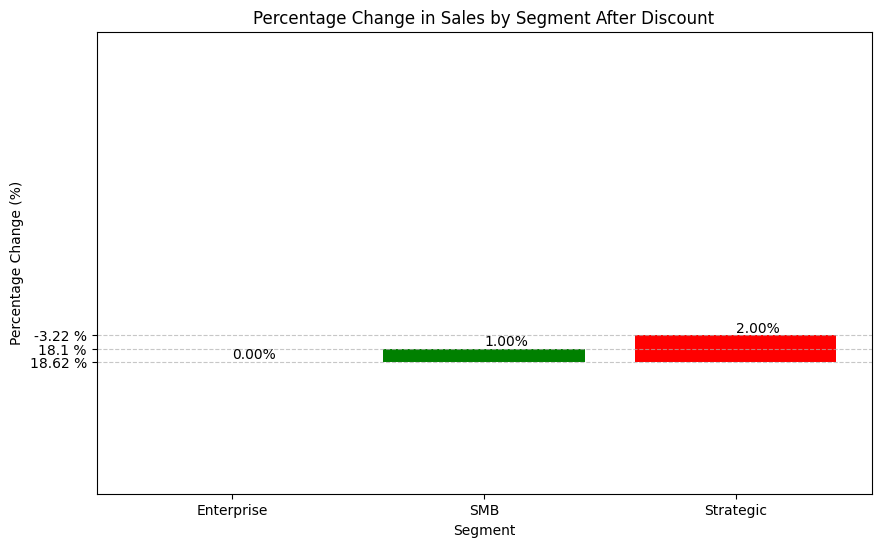

In [ ]:
# Membuat Grafik Batang
plt.figure(figsize=(10, 6))
bars = plt.bar(comparison['segment'], comparison['percentage_change'], color=['blue', 'green', 'red'])

# Menambahkan Label dan Title
plt.xlabel('Segment')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change in Sales by Segment After Discount')

# Menambahkan Nilai Persentase pada Setiap Bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom')  # va: vertical alignment

plt.ylim(-10, 25)  # Menyesuaikan rentang sumbu y untuk menampilkan label dengan baik
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid pada sumbu y

plt.show()

## Analisa Segmen pelanggan yang paling responsif terhadap diskon

Jika dilihat dari hasil explore Data maka Segment Enterprise mengalami peningkatan penjualan yang signifikan setelah penerapan diskon. Peningkatan sebesar 18.62% menunjukkan bahwa diskon memiliki dampak positif yang kuat pada penjualan dalam segmen ini.

Interpretasi: SMB menunjukkan persentase positif yang cukup tinggi. Ini menunjukkan bahwa segmen SMB berkontribusi secara signifikan terhadap metrik yang diukur (misalnya, penjualan, keuntungan, atau metrik lain yang relevan). Segmen ini tampaknya berperforma baik atau mengalami pertumbuhan yang positif.
Interpretasi: Persentase Enterprise juga positif, meskipun sedikit lebih rendah dibandingkan dengan SMB. Ini menunjukkan bahwa segmen Enterprise juga memberikan kontribusi yang baik, tetapi mungkin tidak sebesar SMB. Segmen ini masih menunjukkan performa yang solid dan mungkin memerlukan perhatian lebih lanjut untuk meningkatkan kontribusi mereka.
Interpretasi: Persentase negatif pada segmen Strategic menunjukkan bahwa segmen ini mengalami penurunan atau kontribusi negatif terhadap metrik yang diukur. Ini bisa berarti adanya tantangan atau masalah dalam segmen ini, yang mungkin memerlukan analisis lebih lanjut untuk memahami penyebab penurunan tersebut dan langkah-langkah untuk perbaikan.

**Kesimpulan:**
- SMB (Small and Medium Business) dan Enterprise menunjukkan performa positif dengan kontribusi masing-masing sebesar 18.62% dan 18.10%. Kedua segmen ini berkontribusi baik terhadap metrik yang diukur, menunjukkan potensi pertumbuhan yang positif dan stabil.
- Strategic mengalami penurunan dengan kontribusi -3.22%, menandakan adanya tantangan atau masalah dalam segmen ini. Penurunan ini perlu ditangani untuk menghindari dampak negatif yang lebih besar.


**Rekomendasi:**

- Fokus pada peningkatan kinerja segmen Strategic dengan menganalisis faktor-faktor yang menyebabkan penurunan dan mengimplementasikan strategi untuk memperbaikinya.
- Pertimbangkan untuk mengeksplorasi lebih lanjut faktor-faktor yang membuat SMB dan Enterprise berhasil dan mencoba untuk menerapkan pelajaran dari segmen ini untuk meningkatkan kinerja segmen lainnya.
- Lakukan analisis mendalam untuk memahami dampak dari setiap segmen terhadap hasil akhir dan bagaimana mereka saling berinteraksi.

# 4. Product Performance

- Produk mana yang paling sering dipesan?
- Produk mana yang memiliki rata-rata penjualan tertinggi per transaksi?
- Produk mana yang memiliki margin keuntungan tertinggi?

In [99]:
order_count = df_sales.groupby('product').agg({'quantity': 'sum'}).reset_index()
order_count.columns = ['product', 'total_quantity']
total_quantity = order_count['total_quantity'].sum()
order_count['percentage'] = (order_count['total_quantity'] / total_quantity * 100).round(2)
order_count['percentage'] = order_count['percentage'].astype(str) + ' ' + '%'
order_count


,product,total_quantity,percentage
0,Alchemy,234,0.62 %
1,Big Ol Database,440,1.16 %
2,ChatBot Plugin,3000,7.92 %
3,ContactMatcher,7215,19.05 %
4,Data Smasher,2976,7.86 %
5,FinanceHub,3756,9.92 %
6,Marketing Suite,868,2.29 %
7,Marketing Suite - Gold,3158,8.34 %
8,OneView,1729,4.57 %
9,SaaS Connector Pack,3563,9.41 %


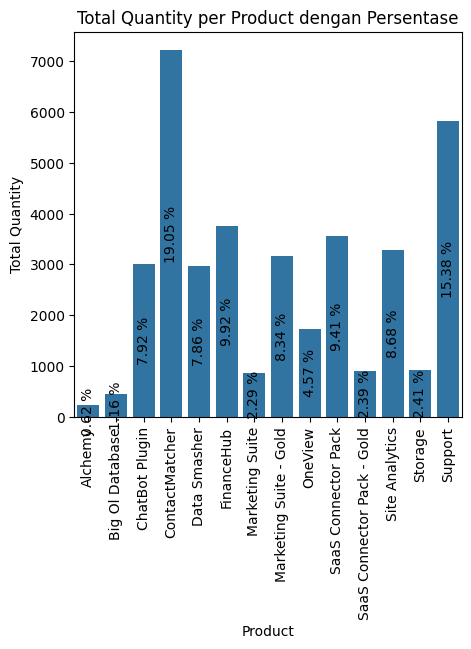

In [ ]:
order_count = df_sales.groupby('product').agg({'quantity': 'sum'}).reset_index()
order_count.columns = ['product', 'total_quantity']
total_quantity = order_count['total_quantity'].sum()
order_count['percentage'] = (order_count['total_quantity'] / total_quantity * 100).round(2)
order_count['percentage'] = order_count['percentage'].astype(str) + ' ' + '%'



plt.figure(figsize=(5, 5))
ax = sns.barplot(data=order_count, y='total_quantity', x='product')
for p in ax.patches:
    height = p.get_height()
    percentage_label = order_count[order_count["total_quantity"] == height]["percentage"].values[0]
    ax.annotate(f'{percentage_label}',
                (p.get_x() + p.get_width() / 2., height / 2),  # Posisi tengah batang secara vertikal
                ha='center', va='center',
                color='black', fontsize=10, rotation=90)

plt.title('Total Quantity per Product dengan Persentase')
plt.xlabel('Product')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Produk mana yang memiliki rata-rata penjualan tertinggi per transaksi?

avg_sales_by_product = df_sales.groupby('product')['sales'].mean().reset_index()
avg_sales_by_product['sales'] = avg_sales_by_product['sales'].round(2)
total_avg_sales_by_product = avg_sales_by_product['sales'].sum()
avg_sales_by_product['percentage'] = avg_sales_by_product['sales'] / total_avg_sales_by_city * 100
avg_sales_by_product['percentage'] = avg_sales_by_product['percentage'].round(2)
avg_sales_by_product['percentage'] = avg_sales_by_product['percentage'].astype(str) + ' ' + '%'
avg_sales_by_product = avg_sales_by_product.sort_values(by='sales', ascending=False)
avg_sales_by_product

,product,sales,percentage
0,Alchemy,2198.94,3.56 %
1,Big Ol Database,1645.55,2.66 %
6,Marketing Suite,503.86,0.81 %
11,Site Analytics,371.21,0.6 %
5,FinanceHub,347.54,0.56 %
7,Marketing Suite - Gold,264.59,0.43 %
8,OneView,230.76,0.37 %
3,ContactMatcher,222.79,0.36 %
4,Data Smasher,215.97,0.35 %
9,SaaS Connector Pack,95.83,0.16 %


Text(0, 0.5, 'Total Penjualan')

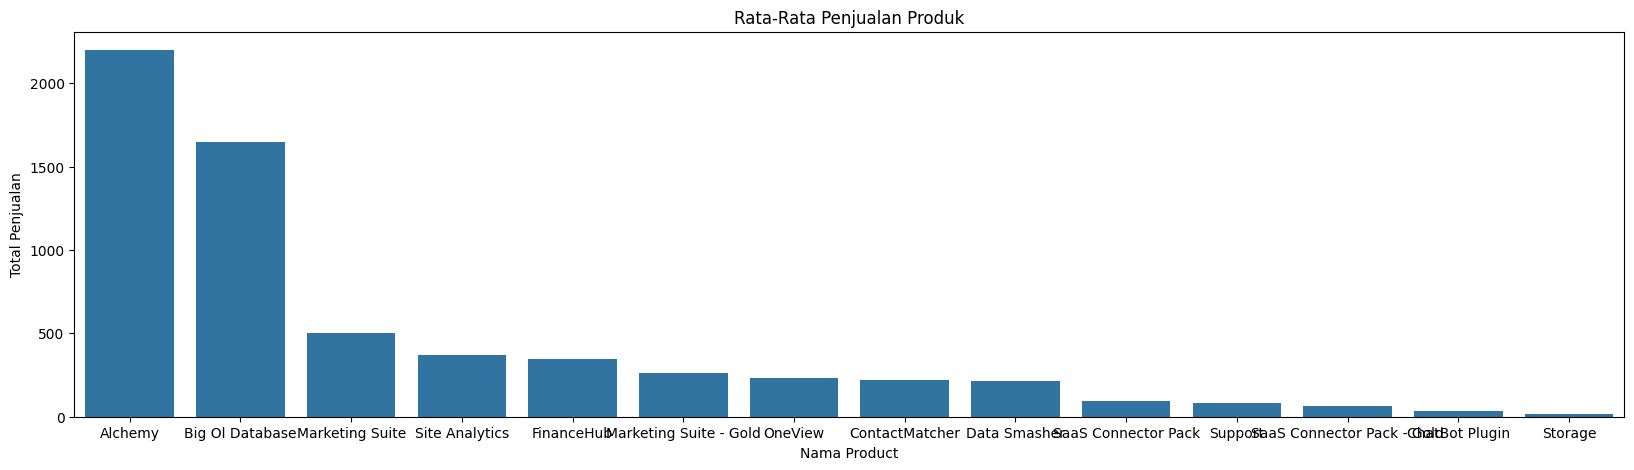

In [ ]:
data_42 = avg_sales_by_product

plt.figure(figsize=(20, 5))
sns.barplot(x='product', y='sales', data=data_42),
plt.title('Rata-Rata Penjualan Produk')
plt.xlabel('Nama Product')
plt.ylabel('Total Penjualan')

## Analisa 4.2

- Alchemy adalah produk unggulan dengan kontribusi penjualan tertinggi yaitu sebesar 2198.94, diikuti oleh Big Ol Database 1645.55 dan Marketing Suite 503.86.
- Produk-produk dengan kontribusi lebih kecil mungkin memerlukan perhatian untuk memahami faktor-faktor yang mempengaruhi penjualannya, seperti strategi pemasaran, target audiens, atau fitur produk.
- Fokus pada produk terlaris dan evaluasi strategi untuk produk dengan kontribusi lebih kecil dapat membantu dalam meningkatkan total penjualan.

**Rekomendasi :**

- Strategi Pengembangan Produk: Fokuskan upaya pengembangan dan pemasaran pada produk yang memiliki kontribusi terbesar untuk memaksimalkan keuntungan.
- Analisis Produk dengan Penjualan Kecil: Tindak lanjuti dengan analisis mendalam untuk produk dengan kontribusi kecil untuk memahami penyebabnya dan mengidentifikasi potensi perbaikan.
- Evaluasi Portofolio Produk: Pertimbangkan untuk menyesuaikan portofolio produk berdasarkan performa dan kontribusi penjualan untuk meningkatkan hasil keseluruhan.

In [ ]:
profit_by_product = df_sales.groupby('product')['profit'].sum().reset_index().round(2)
profit_by_product = profit_by_product.sort_values(by='profit', ascending=False)
total_profit = profit_by_product['profit'].sum()
profit_by_product['percentage'] = profit_by_product['profit'] / total_profit * 100
profit_by_product['percentage'] = profit_by_product['percentage'].round(2)
profit_by_product['percentage'] = profit_by_product['percentage'].astype(str) + ' ' + '%'
profit_by_product

,product,profit,percentage
0,Alchemy,55617.82,19.42 %
11,Site Analytics,44515.73,15.54 %
4,Data Smasher,41936.64,14.64 %
13,Support,32864.47,11.48 %
5,FinanceHub,32136.42,11.22 %
7,Marketing Suite - Gold,21278.83,7.43 %
8,OneView,18138.01,6.33 %
9,SaaS Connector Pack,13059.14,4.56 %
3,ContactMatcher,12496.28,4.36 %
10,SaaS Connector Pack - Gold,6964.18,2.43 %


Text(0, 0.5, 'Total Penjualan')

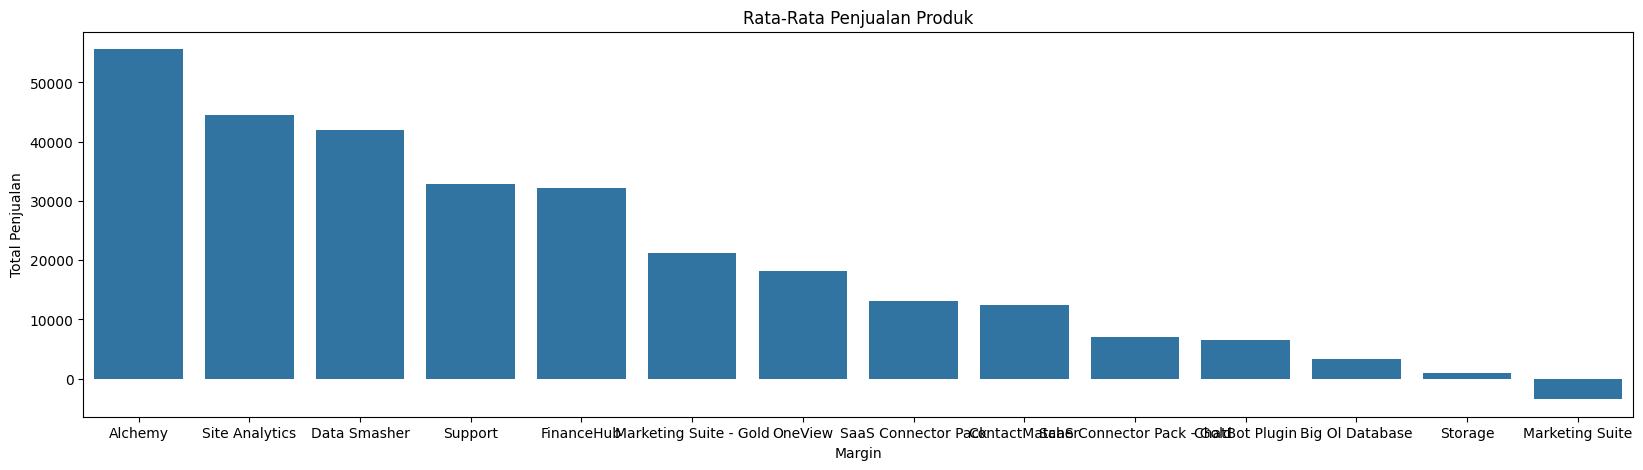

In [ ]:
data_43 = profit_by_product 

plt.figure(figsize=(20, 5))
sns.barplot(x='product', y='profit', data=data_43),
plt.title('Rata-Rata Penjualan Produk')
plt.xlabel('Margin')
plt.ylabel('Total Penjualan')

## Analisa 4.3

Alchemy: Memiliki keuntungan tertinggi 55,617.82 dengan kontribusi 19.42%. Ini menunjukkan bahwa Alchemy adalah produk paling menguntungkan dan memberikan kontribusi terbesar terhadap total keuntungan.

Alchemy adalah produk yang paling menguntungkan, diikuti oleh Site Analytics dan Data Smasher, yang bersama-sama menyumbang sebagian besar keuntungan.
Produk-produk dengan keuntungan lebih kecil masih memberikan kontribusi, namun tidak se-signifikan produk unggulan.
Marketing Suite mengalami kerugian, yang menunjukkan perlunya analisis lebih lanjut untuk memahami penyebab kerugian dan perbaikan yang diperlukan.

**Rekomendasi :**

- Fokus pada Produk Unggulan: Teruskan pengembangan dan promosi produk yang paling menguntungkan untuk memaksimalkan keuntungan.
- Analisis Kerugian: Investigasi penyebab kerugian pada Marketing Suite dan evaluasi strategi untuk perbaikan atau kemungkinan penarikan produk.
- Optimalisasi Portofolio: Pertimbangkan strategi untuk meningkatkan keuntungan dari produk dengan kontribusi lebih kecil dan evaluasi potensi untuk peningkatan atau penghapusan produk yang tidak menguntungkan.

# Import to Excel

In [ ]:
df.to_excel('', index=False)